In [24]:
import matplotlib.pyplot as plt
import numpy as np


## Matplotlib provided examples

In [25]:
# The points at which quivers will appear
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
# The direction the quivers will point
U = np.cos(X)
V = np.sin(Y)

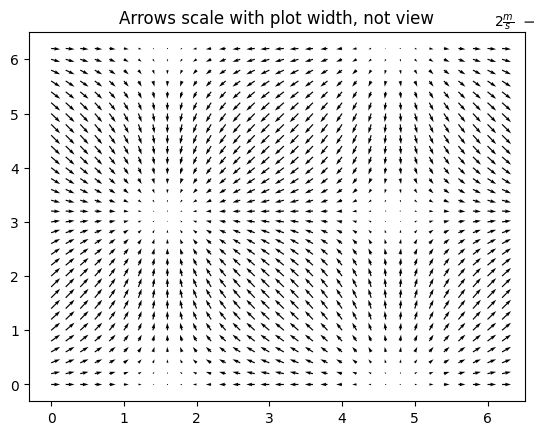

In [26]:
fig1, ax1 = plt.subplots()
ax1.set_title('Arrows scale with plot width, not view')
Q = ax1.quiver(X, Y, U, V, units='width')
qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='W',
                   coordinates='figure')

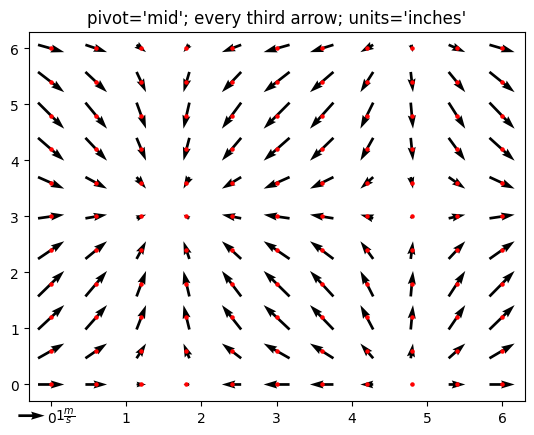

In [27]:
fig2, ax2 = plt.subplots()
ax2.set_title("pivot='mid'; every third arrow; units='inches'")
Q = ax2.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
               pivot='mid', units='inches')
qk = ax2.quiverkey(Q, 0.15, 0.08, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
ax2.scatter(X[::3, ::3], Y[::3, ::3], color='r', s=5)

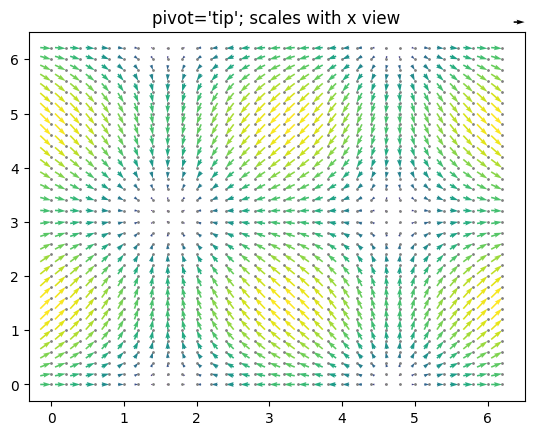

In [28]:
fig3, ax3 = plt.subplots()
ax3.set_title("pivot='tip'; scales with x view")
M = np.hypot(U, V)
Q = ax3.quiver(X, Y, U, V, M, units='x', pivot='tip', width=0.022,
               scale=1 / 0.15)
qk = ax3.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
ax3.scatter(X, Y, color='0.5', s=1)

plt.show()

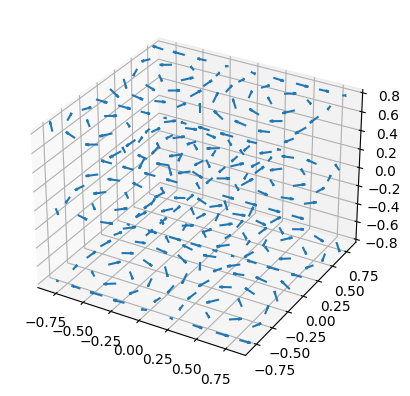

In [29]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

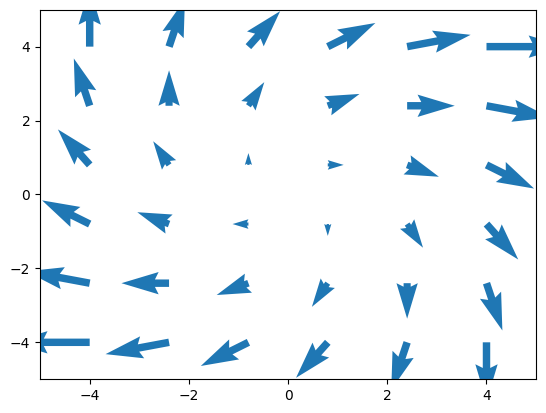

In [30]:
# make data
x = np.linspace(-4, 4, 6)
y = np.linspace(-4, 4, 6)
X, Y = np.meshgrid(x, y)
U = X + Y
V = Y - X

# plot
fig, ax = plt.subplots()

ax.quiver(X, Y, U, V, color="C0", angles='xy',
          scale_units='xy', scale=5, width=.015)

ax.set(xlim=(-5, 5), ylim=(-5, 5))

plt.show()

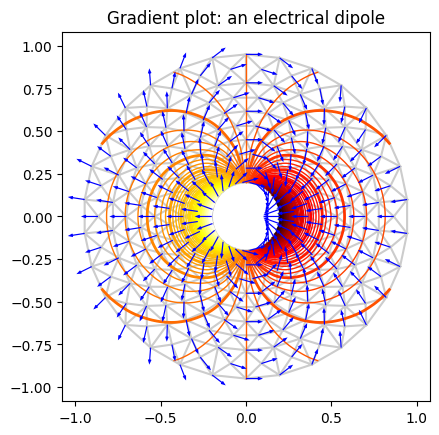

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.tri import (CubicTriInterpolator, Triangulation,
                            UniformTriRefiner)


# ----------------------------------------------------------------------------
# Electrical potential of a dipole
# ----------------------------------------------------------------------------
def dipole_potential(x, y):
    """The electric dipole potential V, at position *x*, *y*."""
    r_sq = x**2 + y**2
    theta = np.arctan2(y, x)
    z = np.cos(theta)/r_sq
    return (np.max(z) - z) / (np.max(z) - np.min(z))


# ----------------------------------------------------------------------------
# Creating a Triangulation
# ----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 30
n_radii = 10
min_radius = 0.2
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
V = dipole_potential(x, y)

# Create the Triangulation; no triangles specified so Delaunay triangulation
# created.
triang = Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

# ----------------------------------------------------------------------------
# Refine data - interpolates the electrical potential V
# ----------------------------------------------------------------------------
refiner = UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(V, subdiv=3)

# ----------------------------------------------------------------------------
# Computes the electrical field (Ex, Ey) as gradient of electrical potential
# ----------------------------------------------------------------------------
tci = CubicTriInterpolator(triang, -V)
# Gradient requested here at the mesh nodes but could be anywhere else:
(Ex, Ey) = tci.gradient(triang.x, triang.y)
E_norm = np.sqrt(Ex**2 + Ey**2)

# ----------------------------------------------------------------------------
# Plot the triangulation, the potential iso-contours and the vector field
# ----------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.set_aspect('equal')
# Enforce the margins, and enlarge them to give room for the vectors.
ax.use_sticky_edges = False
ax.margins(0.07)

ax.triplot(triang, color='0.8')

levels = np.arange(0., 1., 0.01)
ax.tricontour(tri_refi, z_test_refi, levels=levels, cmap='hot',
              linewidths=[2.0, 1.0, 1.0, 1.0])
# Plots direction of the electrical vector field
ax.quiver(triang.x, triang.y, Ex/E_norm, Ey/E_norm,
          units='xy', scale=10., zorder=3, color='blue',
          width=0.007, headwidth=3., headlength=4.)

ax.set_title('Gradient plot: an electrical dipole')
plt.show()

## Expirementing

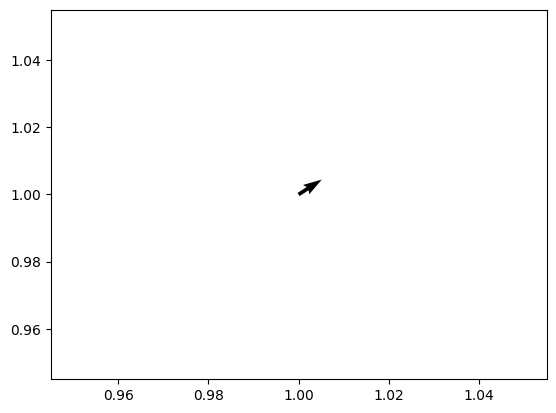

In [32]:
plt.quiver(1,1,np.sin(1),np.cos(1))

c:\Python\3.10.8\lib\site-packages\matplotlib\quiver.py:609: RuntimeWarning: invalid value encountered in divide
  lengths = np.hypot(*dxy.T) / eps


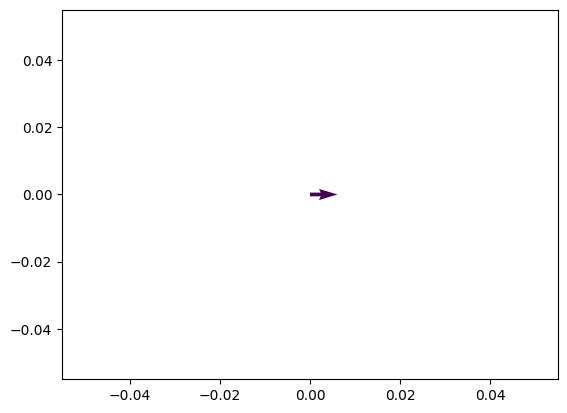

In [33]:
plt.quiver(1,1,90, angles='xy')

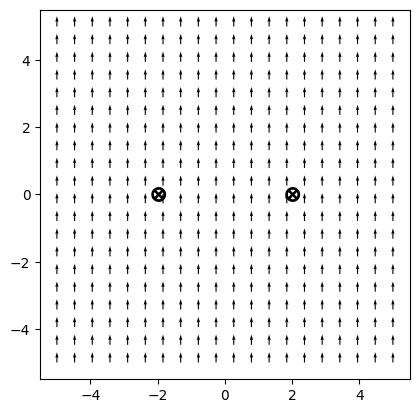

In [34]:
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

# Placeholder vector field, all arrows pointing up as a test
U = np.zeros_like(X)
V = np.ones_like(Y)



fig, ax = plt.subplots()
ax.set_aspect('equal')

# Show the wires going into the page at specific coordinates
wire_positions = [(-2, 0), (2, 0)]  # Define locations of the two wires
for wx, wy in wire_positions:
    ax.scatter(wx, wy, color='black', s=100, marker='$\\bigotimes$')  # Circled X


ax.quiver(X,Y,U,V)

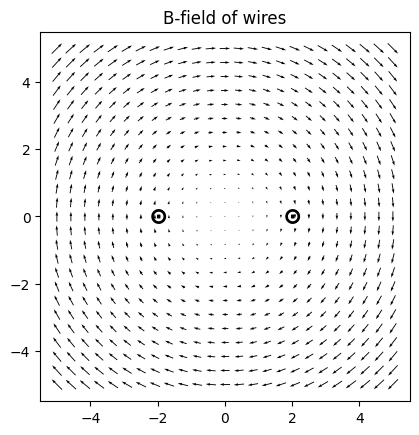

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid of points for the quiver plot
x = np.linspace(-5, 5, 25)
y = np.linspace(-5, 5, 25)
X, Y = np.meshgrid(x, y)

# Wire positions
wire_positions = [
    (2,0),
    (-2,0)
    ]

# Initialize U and V components for the direction
U = np.zeros_like(X)
V = np.zeros_like(Y)

# Calculate field direction (not magnitude) using left-hand rule
for (wx, wy) in wire_positions:
    # Distance components from the wire to each point on the grid
    dx = X - wx
    dy = Y - wy
    
    # Define the direction only (left-hand rule for electron flow)
    U += dy   # Tangential x-component
    V += -dx  # Tangential y-component

# Plotting
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_title('B-field of wires')

# Show the wires going into the page with a circled X
for wx, wy in wire_positions:
    ax.scatter(wx, wy, color='black', s=100, marker='$\\bigodot$')

# Plot the magnetic field directions only
ax.quiver(X, Y, U, V, pivot='mid')

plt.show()


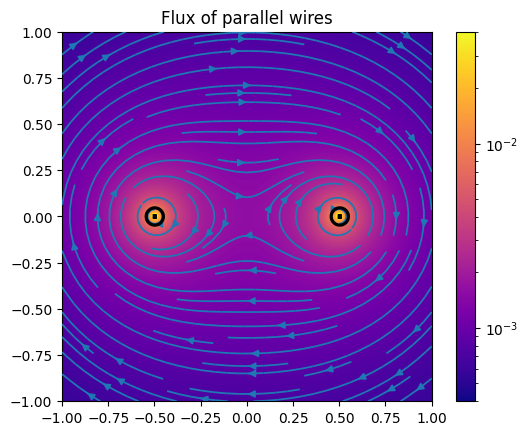

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Constants
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space (T·m/A)
I = 2  # Current in each wire (Amps)


# Define the grid of points for the quiver plot
x = y = np.linspace(-1, 1, 201)
X, Y = np.meshgrid(x, y)

# Wire positions
wire_positions = [
    (-.5, 0), 
    ( .5, 0),
    # (0, .5),
    ]

# Initialize U and V components for the magnetic field
U = np.zeros_like(X)
V = np.zeros_like(Y)
C = np.zeros_like(Y)

# Calculate magnetic field contributions from each wire
for (wx, wy) in wire_positions:
    # Distance components from the wire to each point on the grid
    dx = X - wx
    dy = Y - wy
    r = np.sqrt(dx**2 + dy**2)/1000
    
    # Avoid division by zero at the location of the wire
    r[r == 0] = np.inf
    
    # Field strength (magnitude) at each point due to the wire
    B_magnitude = (mu_0 * I) / (2 * np.pi * r)
    C += B_magnitude
    
    # Calculate the tangential field direction and scale by B_magnitude
    U += B_magnitude * dy / r   # x-component of the magnetic field
    V += -B_magnitude * dx / r  # y-component of the magnetic field

# Plotting
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_title('Flux of parallel wires')
ax.set_ylim(Y.min(),Y.max())
ax.set_xlim(X.min(),X.max())

img = ax.imshow(
            C,
            cmap='plasma',
            norm=LogNorm(vmin=C.min(), vmax=C.max()),
            origin='lower',
            extent=(X.min(),X.max(),Y.min(),Y.max()),
            zorder = 1
        )

fig.colorbar(img)

# Show the lines of flux
ax.streamplot(
    X,Y,U,V,
    density=1,
    linewidth=1.3,
    # color='blue',
    zorder = 3
    )

# Show the wires going into the page with a circled X
for wx, wy in wire_positions:
    ax.scatter(
        wx, wy, 
        color='black', 
        s=200, 
        marker='$\\bigodot$',
        zorder=5
        )


plt.show()
